In [1]:
import pandas as pd
import numpy as np

# Warning Handling:
import warnings
warnings.filterwarnings('ignore')

# Visualization Library:
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing and PipeLine Library:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,PolynomialFeatures

# Classification Model Libraries:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier

# Sampling and Metrics Libraries:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score

# Joblib Library for Picking :
import joblib

In [2]:
data = pd.read_csv('train_loan_data.csv')


In [3]:
data.shape

(80000, 28)

In [4]:
data.shape

(80000, 28)

In [5]:
data.tail(15)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
79985,NV,500000.0,Feb-1996,9 years,CEO,709.0,705.0,A,MORTGAGE,Individual,...,0.0,debt_consolidation,28494.0,53.3,A4,36 months,Debt consolidation,37.0,Source Verified,Fully Paid
79986,GA,35000.0,May-2008,1 year,Interior Designer,669.0,665.0,E,RENT,Individual,...,0.0,debt_consolidation,10791.0,78.8,E4,60 months,Debt consolidation,36.0,Not Verified,Fully Paid
79987,CO,100000.0,Aug-2005,3 years,COAL MINER,679.0,675.0,C,MORTGAGE,Individual,...,0.0,credit_card,13452.0,86.2,C2,36 months,Credit card refinancing,21.0,Source Verified,Fully Paid
79988,PA,52000.0,Nov-2000,1 year,Catapult Learning,699.0,695.0,B,RENT,Individual,...,0.0,debt_consolidation,4665.0,18.9,B3,36 months,Consolidate 2012,10.0,Source Verified,Fully Paid
79989,WA,53800.0,Mar-2002,10+ years,Forklift Driver,664.0,660.0,C,MORTGAGE,Individual,...,1.0,debt_consolidation,4902.0,32.0,C5,36 months,Debt consolidation,22.0,Verified,Fully Paid
79990,OK,45000.0,Sep-1986,< 1 year,Teacher,804.0,800.0,A,MORTGAGE,Joint App,...,0.0,debt_consolidation,2183.0,4.2,A2,36 months,Debt consolidation,12.0,Verified,Fully Paid
79991,TX,25125.0,Nov-2000,NaN,NaN,674.0,670.0,C,MORTGAGE,Individual,...,0.0,debt_consolidation,1949.0,36.8,C4,36 months,Debt consolidation,23.0,Verified,Fully Paid
79992,FL,24000.0,Apr-1988,6 years,repair tec,669.0,665.0,D,RENT,Individual,...,0.0,credit_card,11459.0,84.9,D2,36 months,Credit card refinancing,20.0,Verified,Fully Paid
79993,PA,121386.0,Jan-1987,10+ years,Deputy Director,694.0,690.0,A,RENT,Individual,...,0.0,credit_card,43756.0,90.2,A3,36 months,Credit card refinancing,17.0,Source Verified,Fully Paid
79994,TN,60000.0,Aug-2008,< 1 year,Physical Therapy Assistant,689.0,685.0,D,RENT,Individual,...,0.0,other,3095.0,36.4,D3,36 months,Other,10.0,Source Verified,Fully Paid


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  float64
 6   fico_range_low        80000 non-null  float64
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  float64
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [7]:
data.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [8]:
data.duplicated().sum()

0

In [9]:
cat_col = data.drop(columns = 'loan_status').select_dtypes(include = object).columns
num_col = data.drop(columns = 'loan_status').select_dtypes(include = np.number).columns
print("No of categorical column : {} \n No of numerical column : {}".format(cat_col.shape[0],num_col.shape[0]))

No of categorical column : 13 
 No of numerical column : 14


In [10]:
print([(i,data[i].nunique(),data[i].unique()) for i in cat_col if data[i].nunique() <60])

[('addr_state', 51, array(['CO', 'CA', 'FL', 'IL', 'MD', 'NY', 'PA', 'WI', 'UT', 'TX', 'AL',
       'KS', 'AR', 'AZ', 'MI', 'MN', 'LA', 'HI', 'NC', 'VT', 'OK', 'KY',
       'ME', 'CT', 'AK', 'NJ', 'IN', 'GA', 'MA', 'OR', 'NM', 'VA', 'TN',
       'SC', 'NV', 'WY', 'WA', 'WV', 'MO', 'OH', 'MS', 'DC', 'NE', 'ID',
       'NH', 'RI', 'SD', 'MT', 'DE', 'ND', 'IA'], dtype=object)), ('emp_length', 11, array(['10+ years', nan, '3 years', '< 1 year', '1 year', '8 years',
       '7 years', '4 years', '2 years', '5 years', '6 years', '9 years'],
      dtype=object)), ('grade', 7, array(['E', 'B', 'F', 'D', 'C', 'A', 'G'], dtype=object)), ('home_ownership', 6, array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)), ('application_type', 2, array(['Individual', 'Joint App'], dtype=object)), ('initial_list_status', 2, array(['w', 'f'], dtype=object)), ('purpose', 14, array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'small_business', 'medical', 'major_p

In [11]:
print([(i,data[i].nunique()) for i in cat_col if data[i].nunique() > 60])

[('earliest_cr_line', 640), ('emp_title', 36661), ('title', 5349)]


In [12]:
cat_col = data.drop(columns = ['loan_status','earliest_cr_line','emp_title','title']).select_dtypes(include = object).columns
num_col = data.drop(columns = 'loan_status').select_dtypes(include = np.number).columns

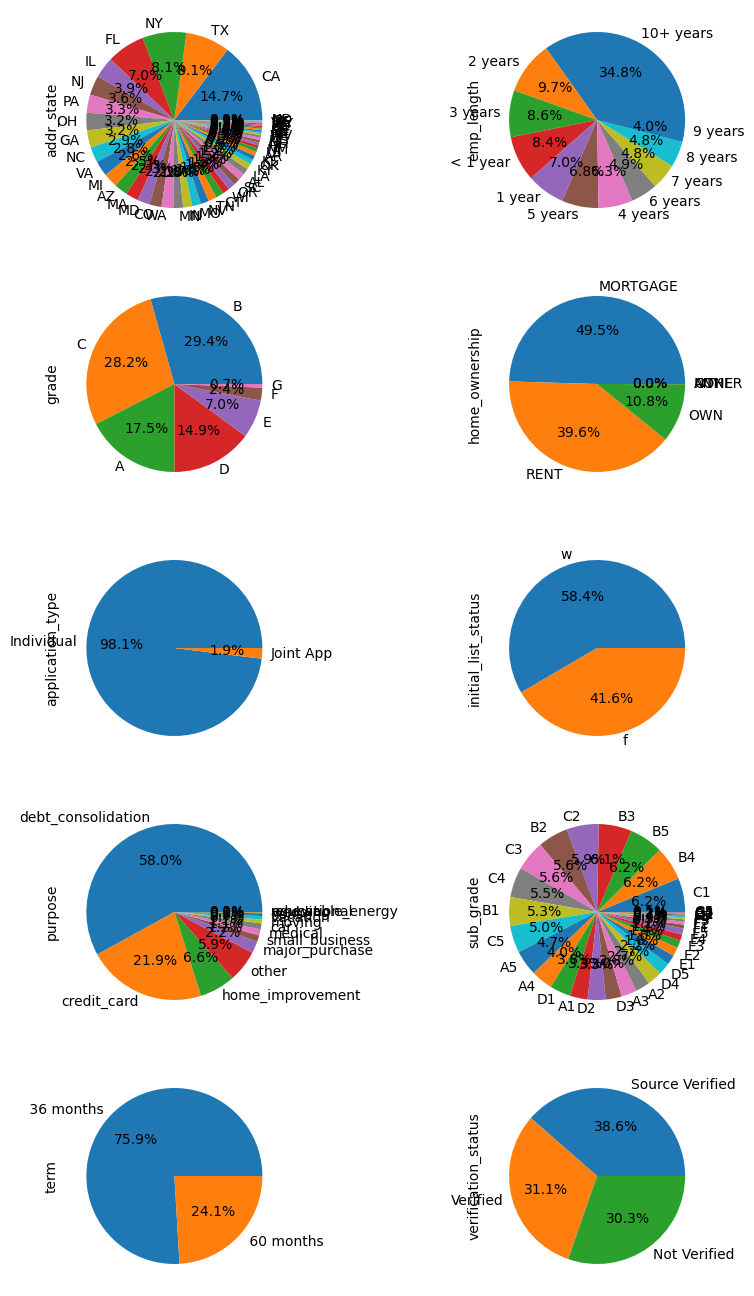

In [13]:
ite = 1
plt.figure(figsize=(10,20))

for i in cat_col:
    plt.subplot(6,2,ite)
    data[i].value_counts().plot.pie(autopct = '%1.1f%%')
    ite +=1


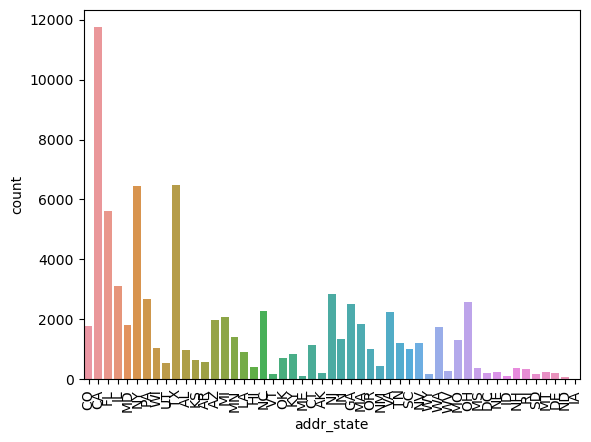

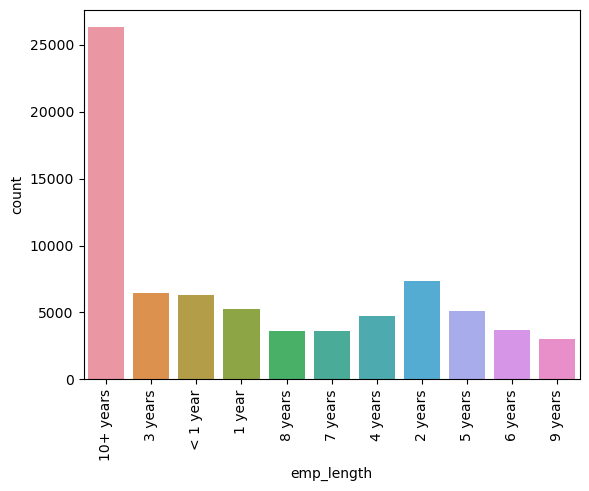

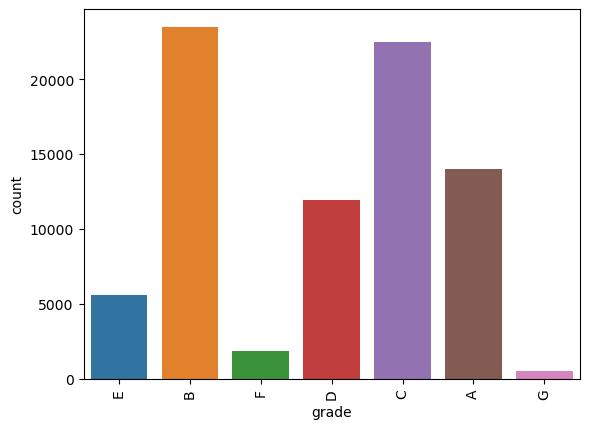

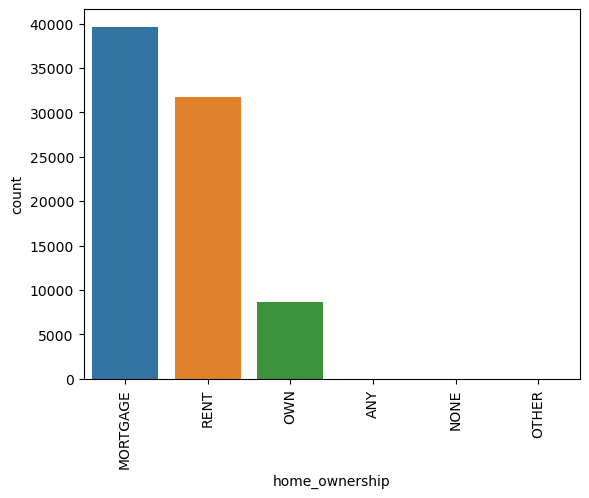

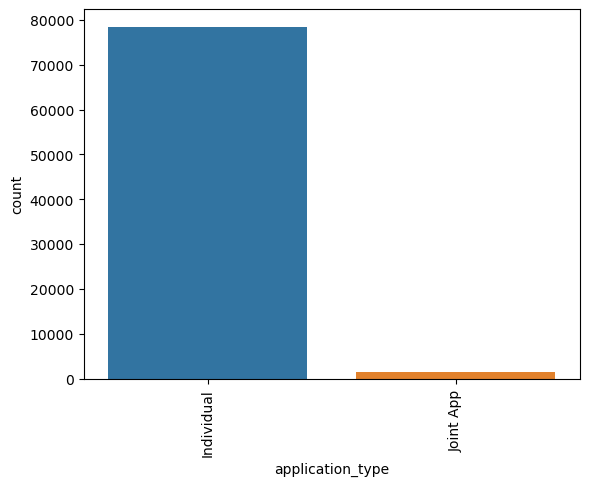

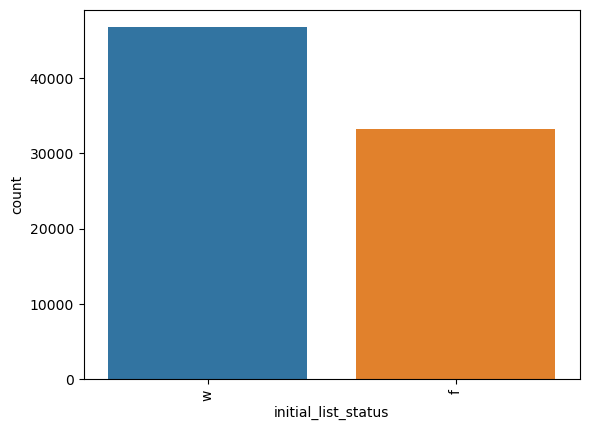

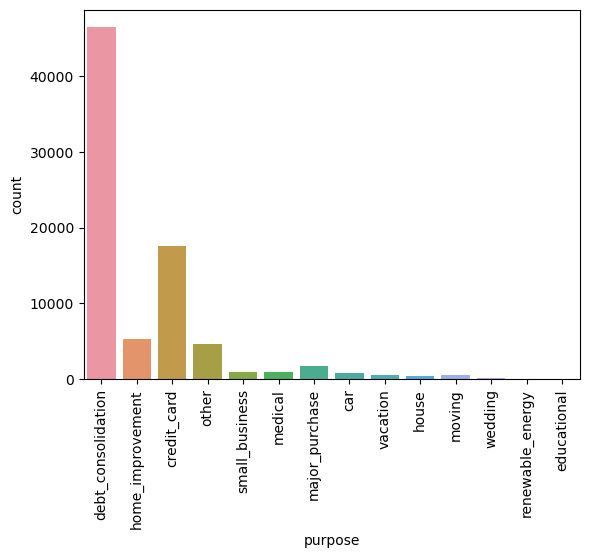

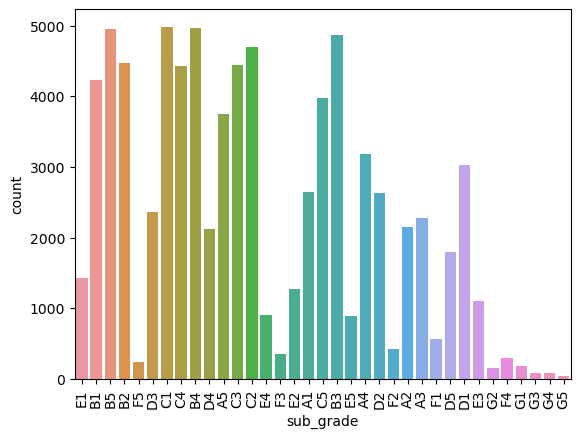

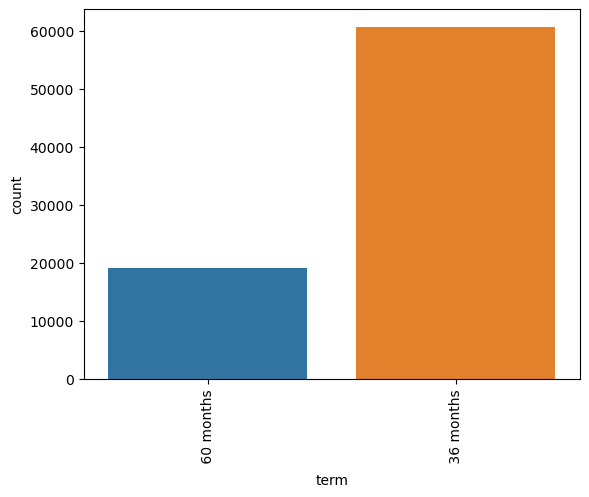

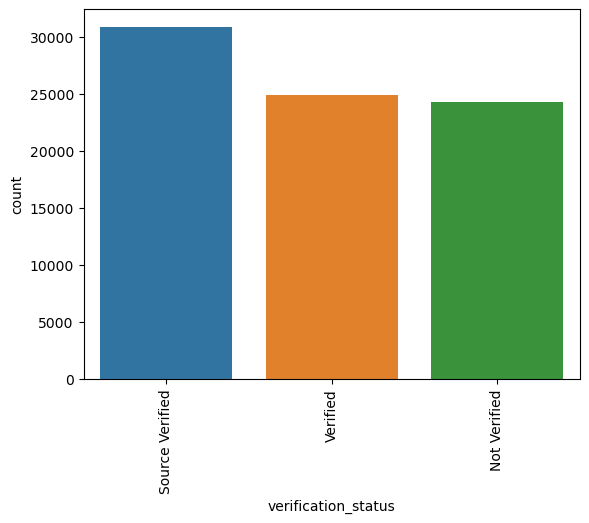

In [14]:
for i in cat_col:
    a= sns.countplot(x=data[i])
    plt.setp(a.get_xticklabels(),rotation = 90)
    plt.show()

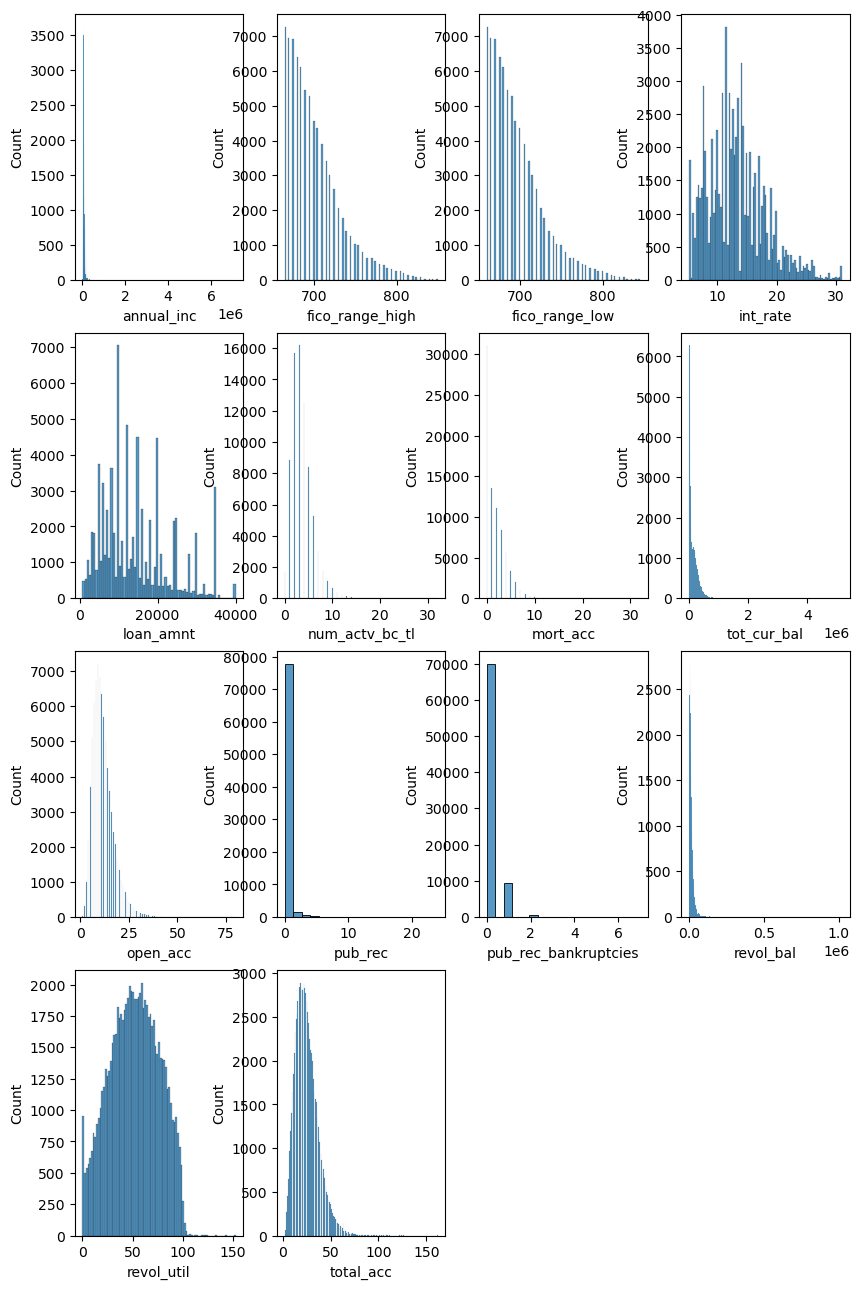

In [15]:
plt.figure(figsize=(10,20))
ite=1
for i in num_col:
    plt.subplot(5,4,ite)
    sns.histplot(x= data[i])
    ite+=1

addr_state
emp_length
grade
home_ownership
application_type
initial_list_status
purpose
sub_grade
term
verification_status


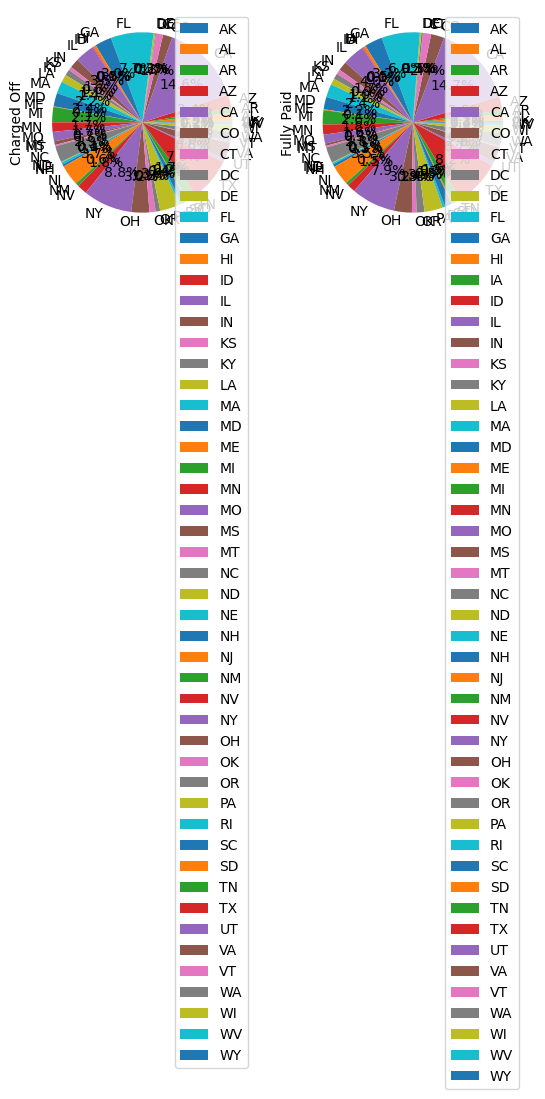

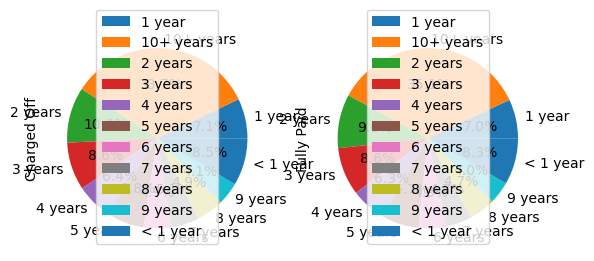

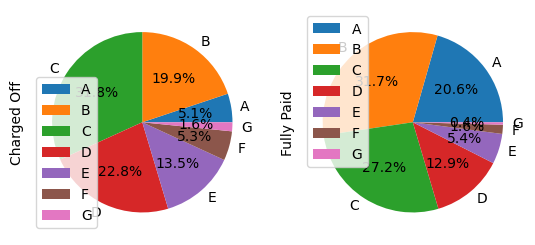

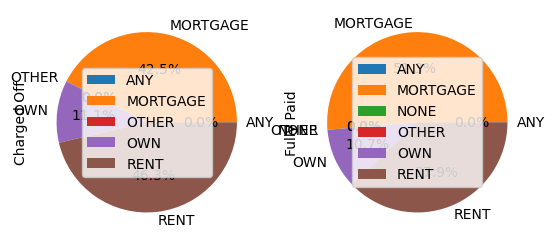

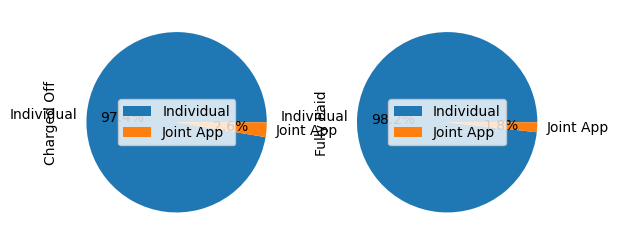

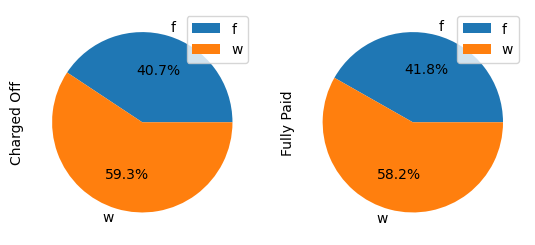

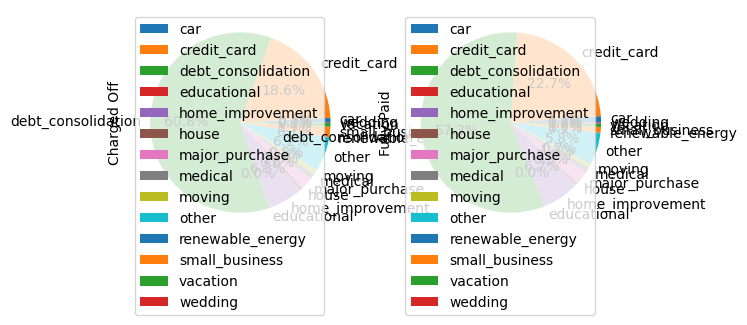

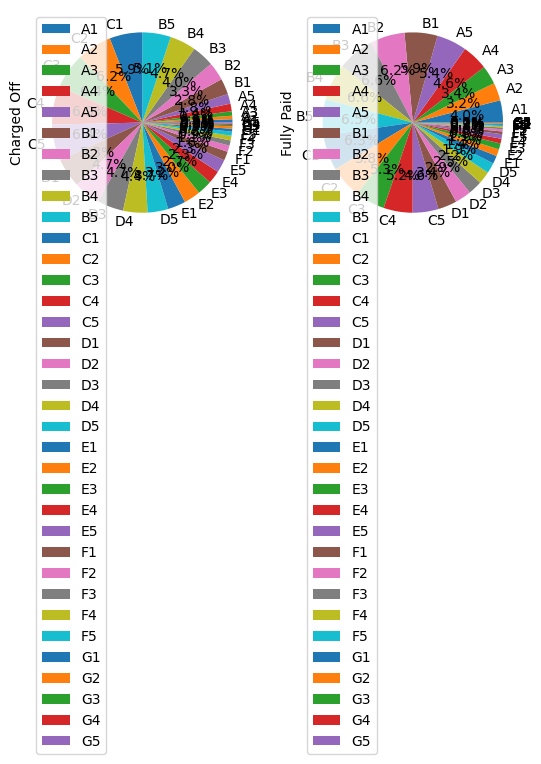

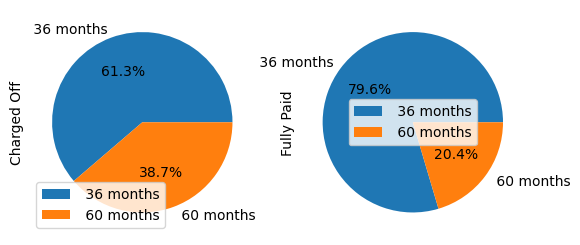

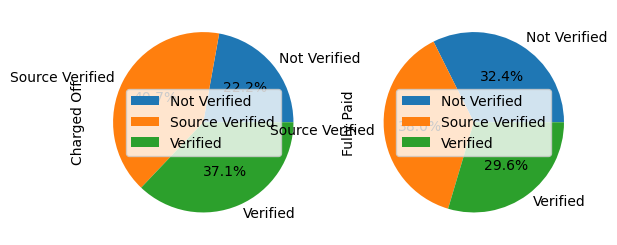

In [16]:
for i in cat_col:
    print (i)
    pd.crosstab(data[i],data['loan_status']).plot.pie(autopct= '%1.1f%%',subplots = True)

<Figure size 1000x1000 with 0 Axes>

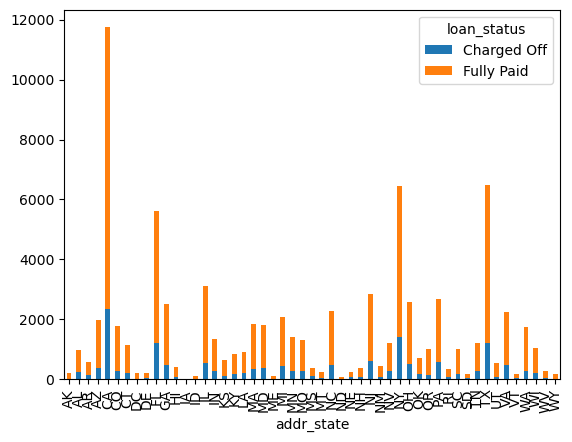

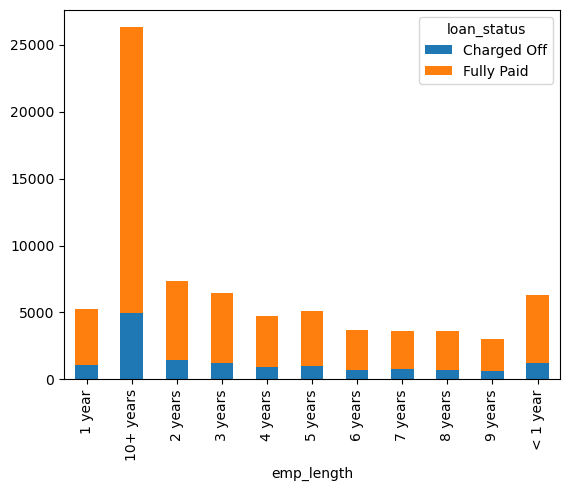

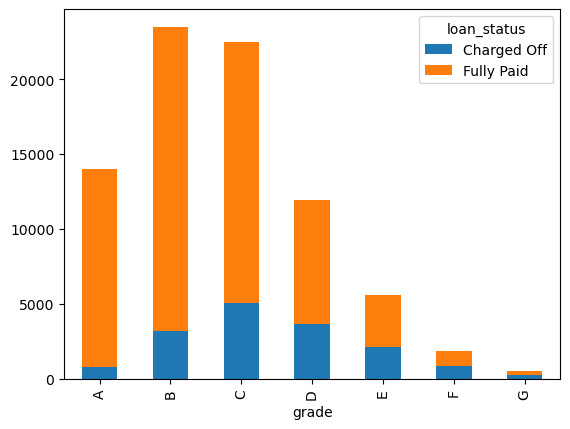

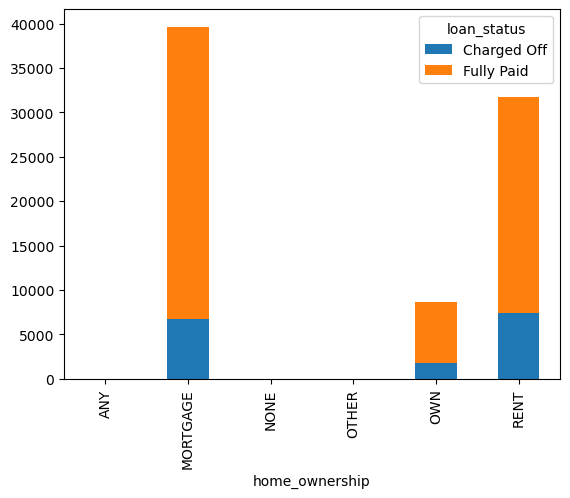

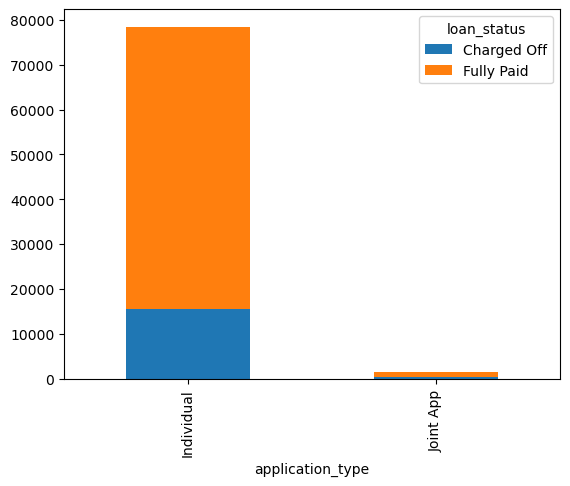

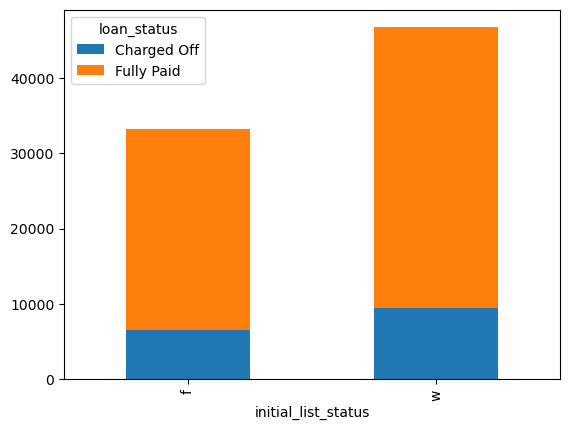

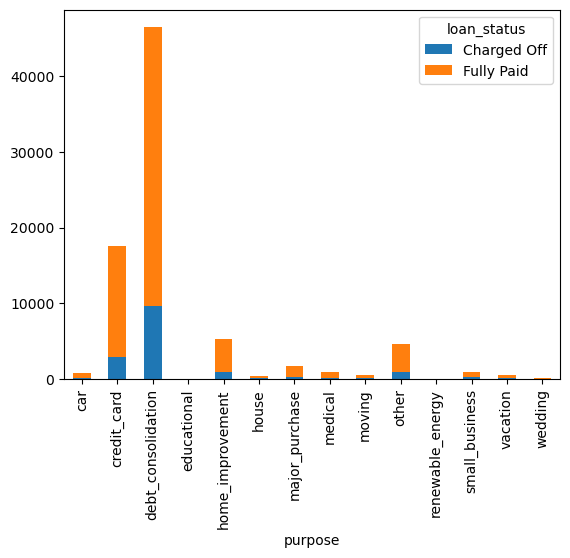

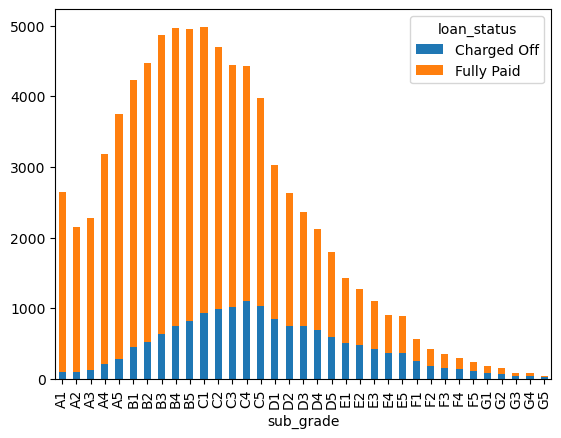

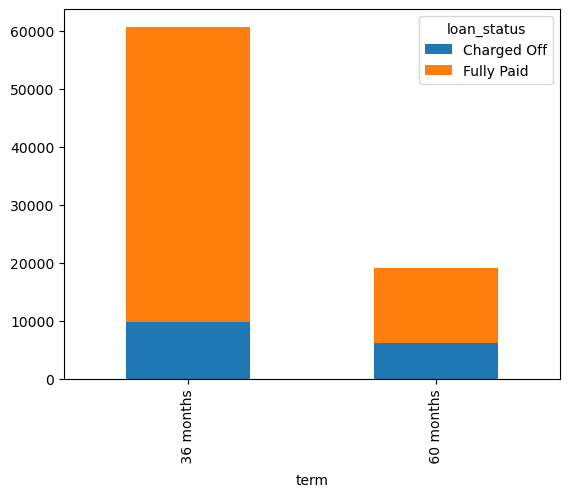

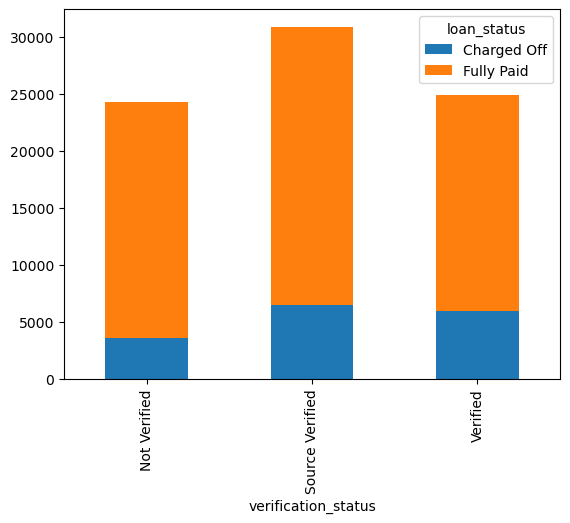

In [17]:
plt.figure(figsize=(10,10))
for i in cat_col:
    pd.crosstab(data[i],data['loan_status']).plot(kind = 'bar',stacked = True)

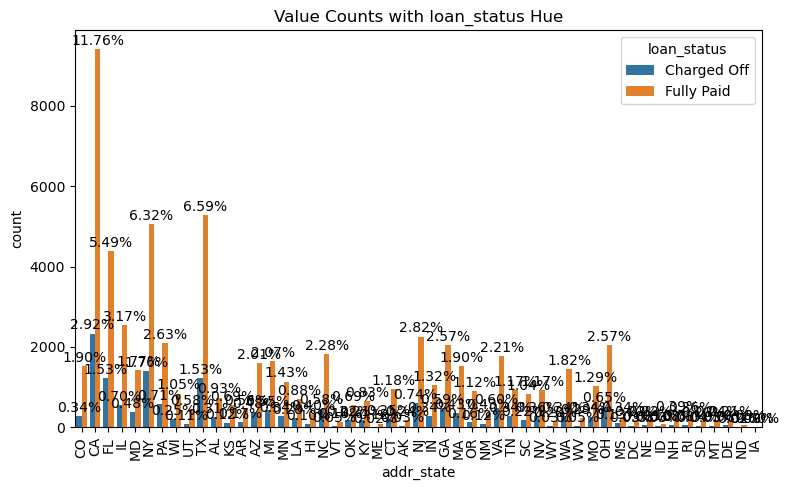

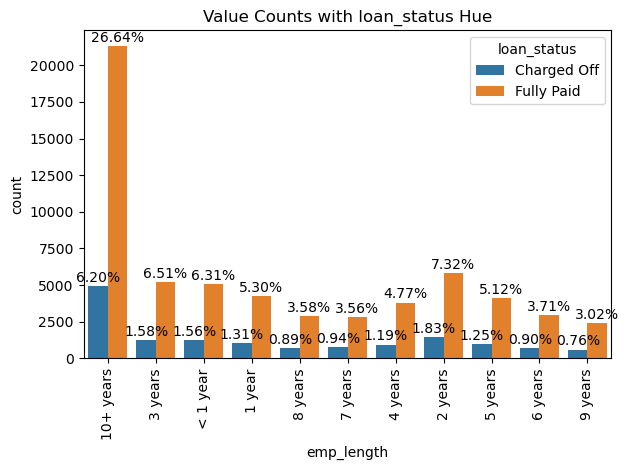

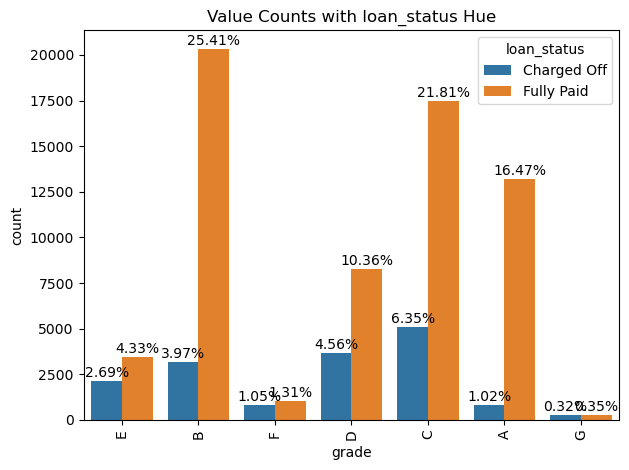

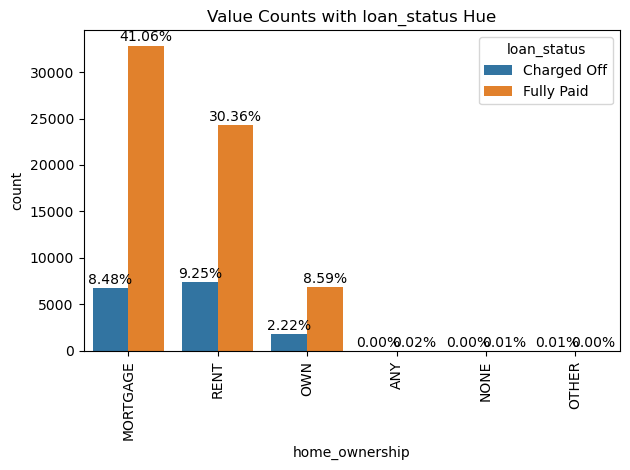

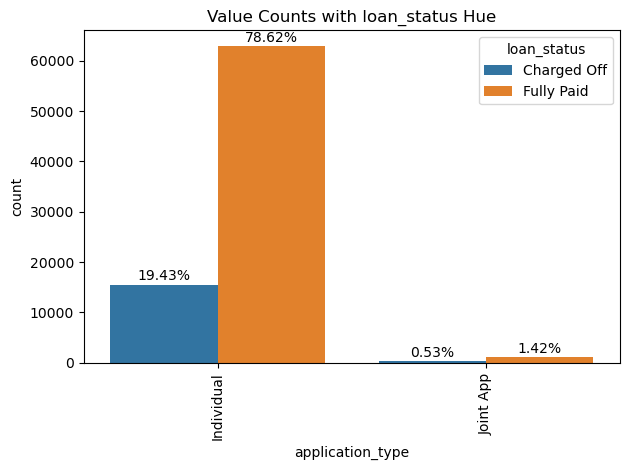

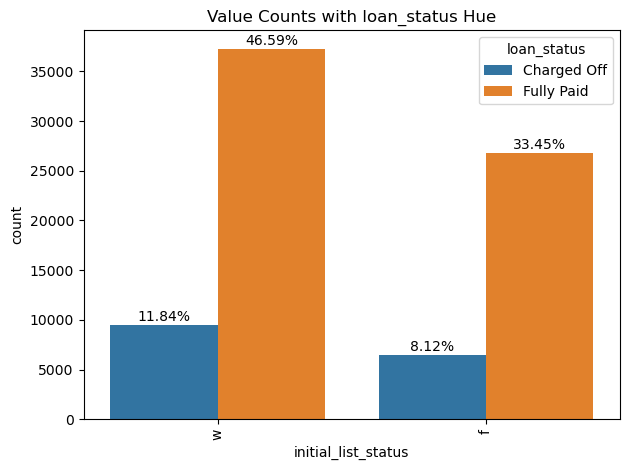

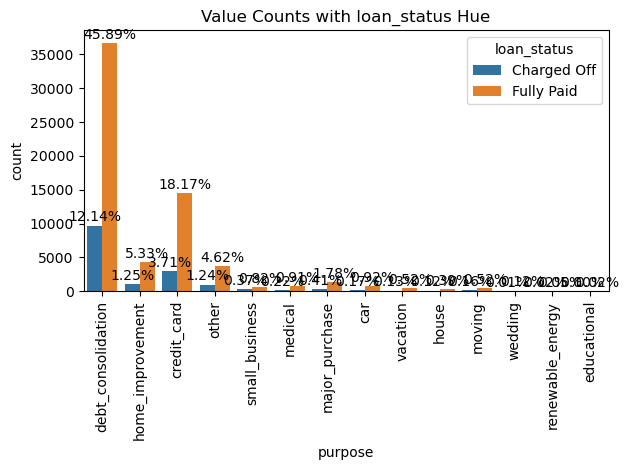

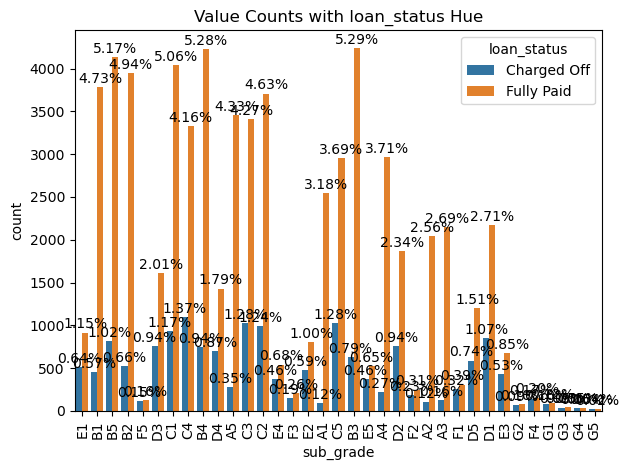

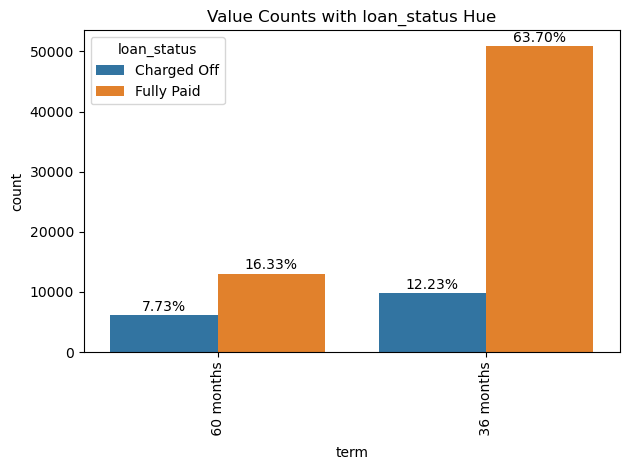

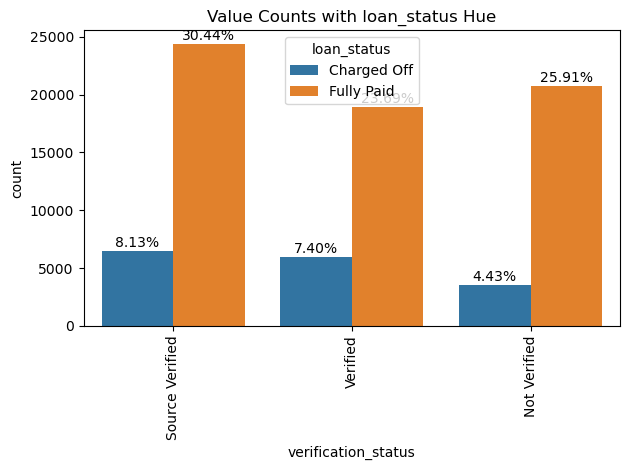

In [18]:
plt.figure(figsize=(8, 5))
for i in cat_col:
    resp_count = sns.countplot(x=i, hue = 'loan_status', data=data)
    plt.setp(resp_count.get_xticklabels(),rotation = 90)
    plt.title('Value Counts with loan_status Hue')
    total = len(data)
    for p in resp_count.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        resp_count.annotate(percentage, (x, y), ha='center', va='center')
    plt.tight_layout()
    plt.show()

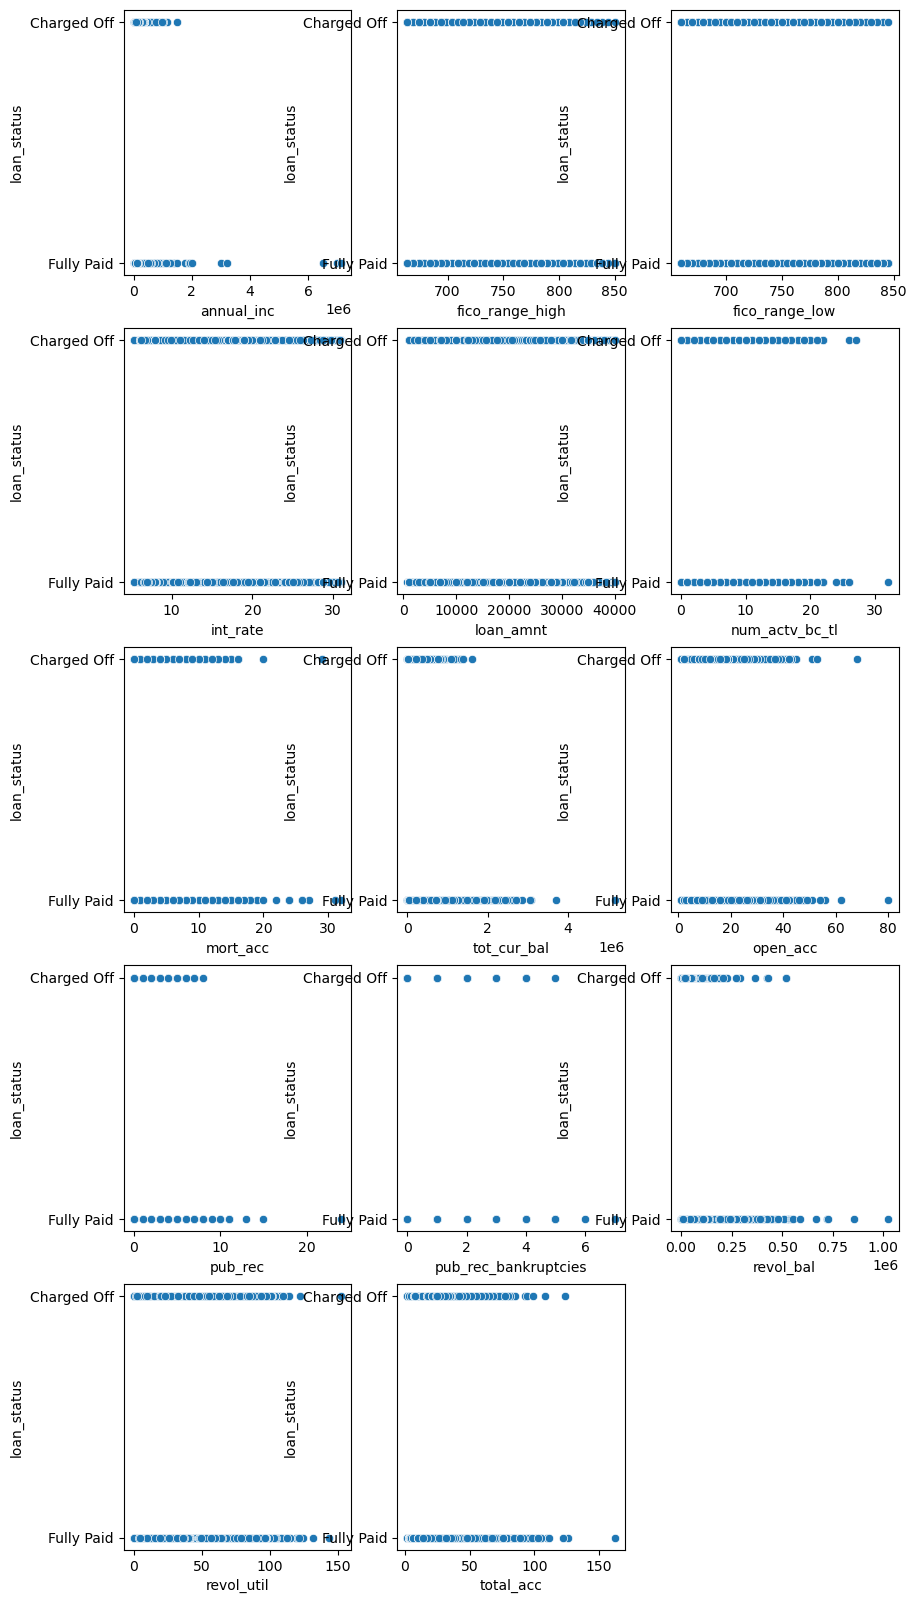

In [19]:
ite = 1
plt.figure(figsize=(10,20))
for i in num_col :
    plt.subplot(5,3,ite)
    sns.scatterplot(x=data[i],y=data['loan_status'])
    ite+=1

In [20]:
data.corr()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
annual_inc,1.000000,0.064655,0.064655,-0.069414,0.319863,0.106228,0.218601,0.430759,0.134215,-0.008990,-0.045238,0.310651,0.044752,0.170555
fico_range_high,0.064655,1.000000,1.000000,-0.402389,0.099921,-0.108283,0.092303,0.135284,0.014905,-0.204863,-0.204737,0.023540,-0.453448,0.013385
fico_range_low,0.064655,1.000000,1.000000,-0.402393,0.099921,-0.108283,0.092303,0.135286,0.014905,-0.204866,-0.204740,0.023543,-0.453448,0.013385
int_rate,-0.069414,-0.402389,-0.402393,1.000000,0.144910,0.019435,-0.078283,-0.087000,-0.004795,0.055351,0.060317,-0.028978,0.239496,-0.040937
loan_amnt,0.319863,0.099921,0.099921,0.144910,1.000000,0.197615,0.226006,0.310725,0.183501,-0.062819,-0.088613,0.319811,0.104931,0.204682
num_actv_bc_tl,0.106228,-0.108283,-0.108283,0.019435,0.197615,1.000000,0.031868,0.097332,0.544174,-0.035742,-0.060311,0.299474,0.103162,0.292003
mort_acc,0.218601,0.092303,0.092303,-0.078283,0.226006,0.031868,1.000000,0.530393,0.113992,-0.007052,0.006431,0.209552,0.030738,0.362553
tot_cur_bal,0.430759,0.135284,0.135286,-0.087000,0.310725,0.097332,0.530393,1.000000,0.238560,-0.073238,-0.098221,0.456139,0.084849,0.299713
open_acc,0.134215,0.014905,0.014905,-0.004795,0.183501,0.544174,0.113992,0.238560,1.000000,-0.010347,-0.013418,0.220704,-0.144939,0.700375
pub_rec,-0.008990,-0.204863,-0.204866,0.055351,-0.062819,-0.035742,-0.007052,-0.073238,-0.010347,1.000000,0.685052,-0.093533,-0.072720,0.018624


<Axes: >

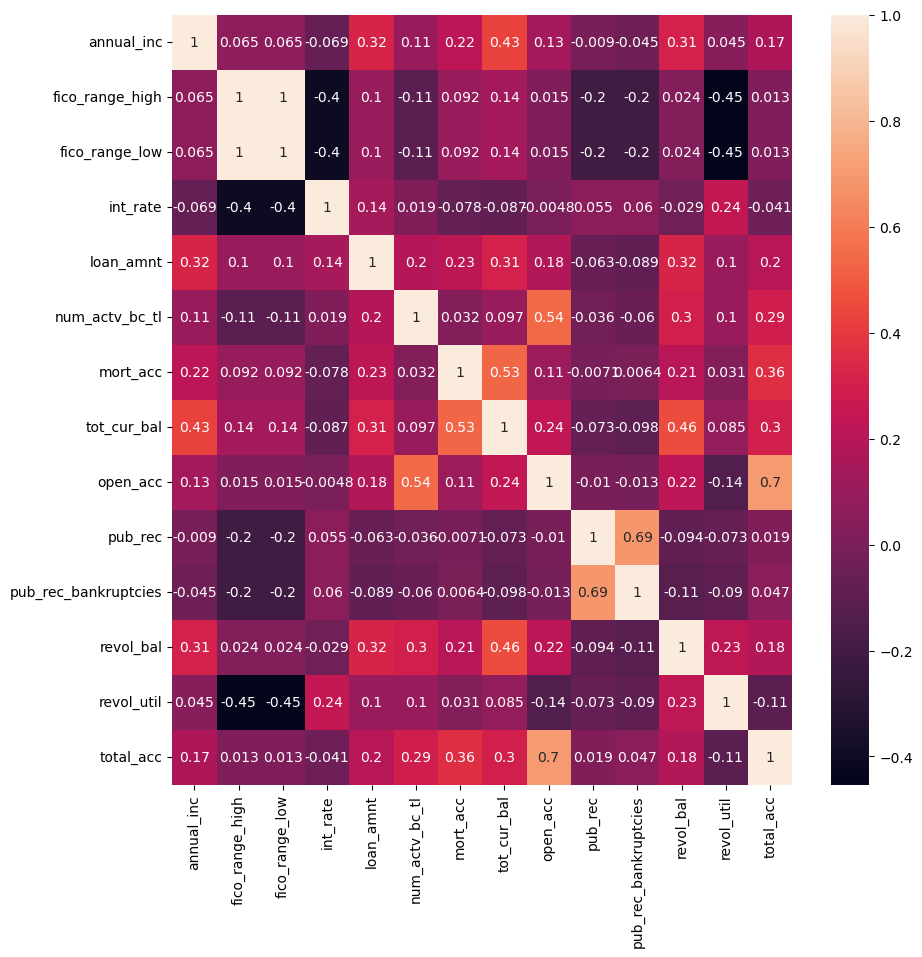

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

3. PipeLining & Modelling

In [22]:
data.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [23]:
categorical_preprocessing = Pipeline([
    ('categorical imputation',SimpleImputer(strategy='most_frequent')),
    ('categorical encoding', OneHotEncoder(sparse= False, handle_unknown='ignore'))
])

In [24]:
numerical_preprocessing = Pipeline([
    ('numerical imputation',SimpleImputer(strategy='mean')),
    ('numerical scaling', MinMaxScaler())
])

In [25]:
Final_preprocessing = ColumnTransformer(
    transformers = [
    ('category',categorical_preprocessing,cat_col),
    ('numerical',numerical_preprocessing,num_col)
])

In [26]:
Package = Pipeline([
    ('preprocessing',Final_preprocessing),
    ('polynomal',PolynomialFeatures(degree=2)),
    ('model',LogisticRegression())
])

In [27]:
data.drop(columns = ['earliest_cr_line','emp_title','title'],inplace = True)

In [28]:
data_x = data.drop(columns = 'loan_status')

In [29]:
data_y = data['loan_status']

In [30]:
data.shape
(80000, 25)

(80000, 25)

In [31]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.2,random_state=50)

In [32]:
Package.fit(train_x,train_y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('categorical '
                                                                   'imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('categorical '
                                                                   'encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['addr_state', 'emp_length', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'purpose',...
                                                                   'imputation',
                                                                   SimpleImputer()),
                                                                  ('numerical '
                                                                   'scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object'))])),
                ('polynomal', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [33]:
train_pred = Package.predict(train_x)
test_pred = Package.predict(test_x)

# Prediction & Model Evaluation

In [38]:
train_pred = Package.predict(train_x)
test_pred = Package.predict(test_x)

# Sampling Technique :

In [42]:

data_y.value_counts()

Fully Paid     64030
Charged Off    15970
Name: loan_status, dtype: int64

In [43]:
rus = RandomUnderSampler()

In [44]:
rus_x,rus_y = rus.fit_resample(train_x,train_y)

In [45]:
rus_y.value_counts()

Charged Off    12749
Fully Paid     12749
Name: loan_status, dtype: int64

In [46]:
train_rus_x,test_rus_x,train_rus_y,test_rus_y = train_test_split(rus_x,rus_y,test_size=0.2,random_state=50)

In [47]:
Package.fit(train_rus_x,train_rus_y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('categorical '
                                                                   'imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('categorical '
                                                                   'encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['addr_state', 'emp_length', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'purpose',...
                                                                   'imputation',
                                                                   SimpleImputer()),
                                                                  ('numerical '
                                                                   'scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object'))])),
                ('polynomal', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [48]:
train_rus_pred = Package.predict(train_rus_x)
test_rus_pred = Package.predict(test_rus_x)

# Model Evaluation:

In [49]:
confusion_matrix(train_rus_y,train_rus_pred),confusion_matrix(test_rus_y,test_rus_pred)

(array([[7420, 2749],
        [2891, 7338]], dtype=int64),
 array([[1581,  999],
        [ 976, 1544]], dtype=int64))

In [50]:
print(classification_report(train_rus_y,train_rus_pred),classification_report(test_rus_y,test_rus_pred))

              precision    recall  f1-score   support

 Charged Off       0.72      0.73      0.72     10169
  Fully Paid       0.73      0.72      0.72     10229

    accuracy                           0.72     20398
   macro avg       0.72      0.72      0.72     20398
weighted avg       0.72      0.72      0.72     20398
               precision    recall  f1-score   support

 Charged Off       0.62      0.61      0.62      2580
  Fully Paid       0.61      0.61      0.61      2520

    accuracy                           0.61      5100
   macro avg       0.61      0.61      0.61      5100
weighted avg       0.61      0.61      0.61      5100



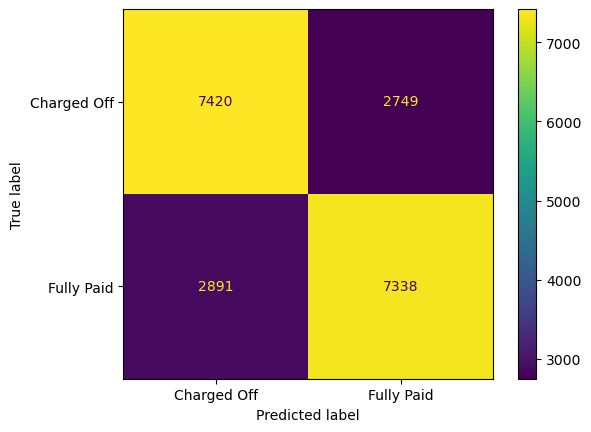

In [51]:
ConfusionMatrixDisplay.from_predictions(train_rus_y,train_rus_pred)   

# Multimodel Implementation : (Without Parameter Tuning)

In [52]:
models = {
    'Logistic':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Decision':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'Voting':VotingClassifier(estimators=[('KNN',KNeighborsClassifier()),
                                        ('Decision',DecisionTreeClassifier()),
                                        ('RF',RandomForestClassifier())],voting='hard'
                            ),
    'Stacking':StackingClassifier(estimators=[('KNN',KNeighborsClassifier()),
                                        ('Decision',DecisionTreeClassifier()),
                                        ('RF',RandomForestClassifier())],
                                 final_estimator=KNeighborsClassifier()
                                )
    }

In [ ]:
res = []
for name,model in models.items():
    print("Model :",name)
    Package = Pipeline([
    ('preprocessing',Final_preprocessing),
    ('Polynomial',PolynomialFeatures(degree=2)),
    ('model',model)
])   
    Package.fit(train_rus_x,train_rus_y) 
    train_y_pred = Package.predict(train_rus_x)
    test_y_pred = Package.predict(test_rus_x)
    train_score = accuracy_score(train_rus_y,train_y_pred)
    test_score = accuracy_score(test_rus_y,test_y_pred)
    '''train_precision = precision_score(train_rus_y,train_y_pred)
    test_precision = precision_score(test_rus_y,test_y_pred)
    train_recall = recall_score(train_rus_y,train_y_pred)
    test_recall = recall_score(test_rus_y,test_y_pred)
    train_f1 = f1_score(train_rus_y,train_y_pred)
    test_f1 = f1_score(test_rus_y,test_y_pred)
    '''
    print("train score",train_score)
    print("test score",test_score)
    res.append([name,train_score,test_score])    
res = pd.DataFrame(res,columns = ['Model','Train_Score','Test_Score'])
print(res)

Model : Logistic
train score 0.7235023041474654
test score 0.6127450980392157
Model : KNN
train score 0.7332581625649573
test score 0.5864705882352941
Model : Decision
train score 1.0
test score 0.5580392156862745
Model : RandomForest
train score 1.0
test score 0.6452941176470588
Model : AdaBoost
